In [1]:
import pandas as pd
import numpy as np

import pickle as pk
import xgboost as xgb
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option("display.max_rows", 8)

In [2]:
df = pd.read_pickle("../../data/df.pkl")
df

,desg,desi,desr,desz,Xaxis,desg_GP,desi_GP,desr_GP,desz_GP,wavelets,...,f14,f15,f16,f17,f18,f19,f20,type,type_bool,REDSHIFT_SPEC
ID,,,,,,,,,,,,,,,,,,,,,
SN10001,"[[0.0, 2.326, 4.792], [2.0, 4.617, 2.249], [9....","[[0.031000000002677552, 8.672, 5.439], [2.1560...","[[0.01600000000325963, 8.834, 5.339], [2.13999...","[[0.06199999999807915, 6.026, 4.693], [2.18699...","[0.0, 1.1313535353535435, 2.262707070707087, 3...","([0.0, 0.818888888888886, 1.637777777777772, 2...","([0.031000000002677552, 1.141676767679467, 2.2...","([0.01600000000325963, 1.076565656568908, 2.13...","([0.06199999999807915, 1.1927272727253795, 2.3...","[9.251771363349247, 8.972870155014132, 8.79160...",...,6.048710,-11.165995,23.954122,18.206973,6.125696,9.448978,-0.078004,II,False,0.59162
SN100023,"[[6.984000000004016, 5.679, 6.387], [7.9920000...","[[7.00800000000163, 4.698, 7.145], [8.02300000...","[[0.0, 16.04, 17.59], [6.992000000005646, 19.8...","[[4.121000000006461, 18.01, 3.601], [7.0230000...","[0.0, 1.3437474747475018, 2.6874949494950036, ...","([6.984000000004016, 8.256929292933277, 9.5298...","([7.00800000000163, 8.189737373738987, 9.37147...","([0.0, 0.8994242424242942, 1.7988484848485884,...","([4.121000000006461, 5.423121212127635, 6.7252...","[12.22728787505526, 11.357060718395505, 10.716...",...,33.710197,-11.581964,28.655932,19.743614,4.619543,37.266792,-16.596040,II,False,0.79264
SN10005,"[[10.027000000001863, 4.996, 8.081], [33.94500...","[[0.015000000006693881, 0.2977, 2.206], [18.94...","[[0.0, 1.033, 1.325], [13.015000000006694, 0.4...","[[0.03500000000349246, 1.826, 3.029], [48.875,...","[0.0, 1.0381919191919462, 2.0763838383838924, ...","([10.027000000001863, 10.782565656567513, 11.5...","([0.015000000006693881, 1.0530404040470573, 2....","([0.0, 1.0281717171717606, 2.056343434343521, ...","([0.03500000000349246, 1.0222929292964054, 2.0...","[2.000004411755352, 2.000003547336676, 2.00000...",...,-26.554909,15.768490,16.436792,17.114795,-20.292951,-24.222566,-11.295562,Ia,True,1.08327
SN10007,"[[0.0, 6.266, 10.48], [10.105999999999767, 17....","[[0.03200000000651926, 7.161, 9.313], [2.01600...","[[2.0, 1.24, 2.429], [10.121000000006461, 20.0...","[[0.9770000000062282, 0.6586, 5.329], [15.9930...","[0.0, 1.5136565656566285, 3.027313131313257, 4...","([0.0, 1.5132626262626456, 3.0265252525252913,...","([0.03200000000651926, 1.5451717171782005, 3.0...","([2.0, 3.49314141414145, 4.9862828282829, 6.47...","([0.9770000000062282, 2.480787878794107, 3.984...","[11.341091517194192, 8.812204685737349, 6.9798...",...,-99.877031,21.670852,24.155364,-26.622112,-27.616185,-19.981432,49.299250,Ia,True,0.82331
SN100085,"[[0.0, 14.24, 18.69], [0.046999999998661224, 1...","[[9.245999999999185, 2.122, 2.955], [17.238000...","[[0.008000000001629815, 0.4534, 9.048], [23.03...","[[0.024000000004889444, 8.451, 7.696], [10.168...","[0.0, 1.2024545454545972, 2.4049090909091944, ...","([0.0, 0.9405757575757411, 1.8811515151514822,...","([9.245999999999185, 10.345121212120416, 11.44...","([0.008000000001629815, 1.0792222222238468, 2....","([0.024000000004889444, 1.226212121217013, 2.4...","[15.77257266262751, 14.440593141555347, 13.455...",...,107.945625,50.144762,-51.038301,-16.732577,34.820195,18.227370,40.000107,II,False,0.65600
SN100114,"[[0.2809999999954016, 6.707, 10.62], [5.260999...","[[0.0, 5.127, 5.467], [5.9799999999959255, 4.5...","[[5.277000000001863, 6.017, 3.299], [6.2609999...","[[4.987999999997555, 1.516, 8.327], [6.9879999...","[0.0, 1.1410505050505044, 2.282101010101009, 3...","([0.2809999999954016, 1.4091111111065586, 2.53...","([0.0, 1.131070707070731, 2.262141414141462, 3...","([5.277000000001863, 6.35468686868872, 7.43237...","([4.987999999997555, 6.078666666664246, 7.1693...","[16.63988584075475, 13.751635665419823, 11.299...",...,-369.659140,53.479668,409.570245,38.452682,213.617159,-298.832847,-141.141259,II,False,0.20095
SN100177,"[[6.980000000003201, 1.914, 2.033], [14.980000...","[[8.042999999997846, 0.01975, 3.008], [19.9800...","

In [6]:
df.REDSHIFT_SPEC.describe()

count    21291.000000
mean         0.669160
std          0.236500
min          0.023250
25%          0.486090
50%          0.667460
75%          0.859225
max          1.115250
Name: REDSHIFT_SPEC, dtype: float64

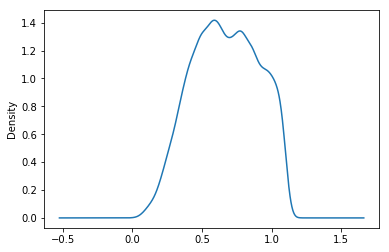

In [12]:
df.REDSHIFT_SPEC.plot.kde()

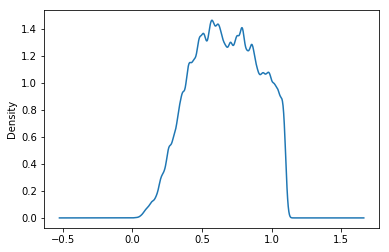

In [22]:
# data = df.REDSHIFT_SPEC
# density = gaussian_kde(data)
# xs = np.linspace(-0.5,1.5,200)
# density.covariance_factor = lambda : .05
# density._compute_covariance()
# plt.plot(xs,density(xs))
# plt.show()
# OR :
df.REDSHIFT_SPEC.plot.kde(bw_method=0.05)

In [10]:
kf_real

KFold(n_splits=19, random_state=None, shuffle=False)

Using MAE, we can put a lower and upper bound on RMSE.

    [MAE] ≤ [RMSE]. The RMSE result will always be larger or equal to the MAE. If all of the errors have the same magnitude, then RMSE=MAE.
    [RMSE] ≤ [MAE * sqrt(n)], where n is the number of test samples. The difference between RMSE and MAE is greatest when all of the prediction error comes from a single test sample. The squared error then equals to [MAE^2 * n] for that single test sample and 0 for all other samples. Taking the square root, RMSE then equals to [MAE * sqrt(n)].

    Focusing on the upper bound, this means that RMSE has a tendency to be increasingly larger than MAE as the test sample size increases.

This can problematic when comparing RMSE results calculated on different sized test samples, which is frequently the case in real world modeling.
Conclusion

RMSE has the benefit of penalizing large errors more so can be more appropriate in some cases, for example, if being off by 10 is more than twice as bad as being off by 5. But if being off by 10 is just twice as bad as being off by 5, then MAE is more appropriate.

From an interpretation standpoint, MAE is clearly the winner. RMSE does not describe average error alone and has other implications that are more difficult to tease out and understand.

On the other hand, one distinct advantage of RMSE over MAE is that RMSE avoids the use of taking the absolute value, which is undesirable in many mathematical calculations (not discussed in this article, another time…).

## Cross Validation

In [16]:
def divide_validation(X, y, splits):
    """
    Divides DF in {splits} splits, in order to destinate ~ 1100 to normal 80-20 train and test.
    Then we Validate with the ~ {len(df) - splits} lines
    """
    kf = KFold(n_splits = splits)
    X_validate = [] # List with Xs to validate
    X_train_test = []  # List with Xs to train and test
    y_validate = [] # List with ys to validate
    y_train_test = []  # List with ys to train and test

    for train_index_real, test_index_real in kf.split(X):
        #print("X_validate:", train_index_real, "X_train_test:", test_index_real)
        X_validate.append(X.iloc[train_index_real])
        X_train_test.append(X.iloc[test_index_real])
        y_validate.append(y[train_index_real])
        y_train_test.append(y[test_index_real])

    return (X_train_test, X_validate, y_train_test, y_validate)

In [17]:
def Kfold(X, y, splits):
    """
    Normal K-Fold
    """
    kf = KFold(n_splits = splits)
    X_train, X_test, y_train, y_test = [], [], [], []

    for train_index, test_index in kf.split(X):
        X_train.append(X.iloc[train_index])
        X_test.append(X.iloc[test_index])
        y_train.append(y[train_index])
        y_test.append(y[test_index])
    return (X_train, X_test, y_train, y_test)

## XGBoost linear regression

In [89]:
def linear_regression(X, y, splits_validation, splits_KFold, regressor):
    ans = []
    X_train_test, X_validate, y_train_test, y_validate = divide_validation(X, y, splits_validation)
    for i in range(len(X_validate)):
        X_train, X_test, y_train, y_test = Kfold(X_train_test[i], y_train_test[i], splits_KFold)
        for j in range(len(X_train)):
            element = dict.fromkeys(['preds_arr','rmse_arr','mae_arr','r2_arr','matrices_arr','true_preds','true_rms','true_mae','true_r2','models'])
            
            regressor.fit(X_train[j],y_train[j]) #Overwrites last data, do not do Incremental learning
            #print("Fitting " + str(j+1) + 'th model from ' + str(i+1) + 'th validation' )
            element['preds_arr'] = regressor.predict(X_test[j])
            element['rmse_arr'] = np.sqrt(mean_squared_error(y_test[j], element['preds_arr']))
            element['mae_arr'] = mean_absolute_error(y_test[j], element['preds_arr'])
            element['r2_arr'] = r2_score(y_test[j], element['preds_arr'])
            element['matrices_arr'] = np.round((abs(y_test[j]-element['preds_arr'])/y_test[j])*100)
            
            element['true_preds'] = regressor.predict(X_validate[i])
            element['true_rms'] = np.sqrt(mean_squared_error(y_validate[i], element['true_preds'])) # RMES -> Aumenta com maiores variancia
            element['true_mae'] = mean_absolute_error(y_validate[i], element['true_preds'])          # MAE -> Nao varia com variancia
            element['true_r2'] = r2_score(y_validate[i], element['true_preds'])
            element['models'] = regressor
            ans.append(element)         
    return ans

def normal_linear_regression(X, y, splits_KFold, regressor):
    ans = []
    X_train, X_test, y_train, y_test = Kfold(X, y, splits_KFold)
    for j in range(len(X_train)):
        element = dict.fromkeys(['preds_arr','rmse_arr','mae_arr','r2_arr','matrices_arr','models'])
        regressor.fit(X_train[j],y_train[j]) #Overwrites last data, do not do Incremental learning
        #print("Fitting " + str(j+1) + 'th model from ' + str(i+1) + 'th validation' )
        element['preds_arr'] = regressor.predict(X_test[j])
        element['rmse_arr'] = np.sqrt(mean_squared_error(y_test[j], element['preds_arr']))
        element['mae_arr'] = mean_absolute_error(y_test[j], element['preds_arr'])
        element['r2_arr'] = r2_score(y_test[j], element['preds_arr'])
        element['matrices_arr'] = np.round((abs(y_test[j]-element['preds_arr'])/y_test[j])*100)

        element['models'] = regressor
        ans.append(element)         
    return ans

## Running real case vs normal (ideal) case

In [90]:
regressor = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
X = df.loc[:,'f1':'f20']
y = np.array(df.REDSHIFT_SPEC)
ans_real_19 = linear_regression(X, y, int(len(df)/1100), 5, regressor)
ans_real_2 = linear_regression(X, y, 2, 5, regressor)
ans_normal = normal_linear_regression(X, y, 5, regressor)

In [92]:
list_and_mean = lambda ans, key : (np.array([i[key] for i in ans]) , np.mean(np.array([i[key] for i in ans])))
# def list_and_mean(ans, key):
#     #list_ = np.array([i[key] for i in ans])
#     return np.array([i[key] for i in ans]) , np.mean(np.array([i[key] for i in ans]))
l_19, mean_19 = list_and_mean(ans_real_19, 'true_rms')
l_2, mean_2 = list_and_mean(ans_real_2, 'true_rms')
l, mean = list_and_mean(ans_normal, 'rmse_arr')
print(" RMSE Means : \n", 
     "\n Validate 19: ", mean_19,
     "\n Validate 2: ", mean_2,
     "\n No Validation: ", mean)
l_19, mean_19 = list_and_mean(ans_real_19, 'true_mae')
l_2, mean_2 = list_and_mean(ans_real_2, 'true_mae')
l, mean = list_and_mean(ans_normal, 'mae_arr')
print("\n MAE Means : \n", 
     "\n Validate 19: ", mean_19,
     "\n Validate 2: ", mean_2,
     "\n No Validation: ", mean)
l_19, mean_19 = list_and_mean(ans_real_19, 'true_r2')
l_2, mean_2 = list_and_mean(ans_real_2, 'true_r2')
l, mean = list_and_mean(ans_normal, 'r2_arr')
print("\n R2 Means : \n", 
     "\n Validate 19: ", mean_19,
     "\n Validate 2: ", mean_2,
     "\n No Validation: ", mean)

 RMSE Means : 
 
 Validate 19:  0.21604570925483899 
 Validate 2:  0.20487603052710918 
 No Validation:  0.20291589691530348

 MAE Means : 
 
 Validate 19:  0.18087175347977422 
 Validate 2:  0.17043753354020633 
 No Validation:  0.16843508925504702

 R2 Means : 
 
 Validate 19:  0.16540352410345993 
 Validate 2:  0.24947351165592976 
 No Validation:  0.26345156697804123


## Standard linear regression

In [ ]:
#TODO